### Imports

In [1]:
from PIL import Image
from PIL import ImageFilter
import numpy as np
import copy
import matplotlib.pyplot as plt 
from numpy import linalg as LA
import scipy.io
import librosa
import IPython
from scipy import signal

### DCT and PCA


In [34]:
img= Image.open("D:/iu/Semester 2/MLSP/assignment2/data/IMG_1878.jpg")

In [35]:
img = np.array(img)

In [36]:
X_r = img[:,:,0]
X_g = img[:,:,1]
X_b = img[:,:,2]

In [37]:
row_n = np.random.randint(0,1015,9)
row_n

array([587, 840, 849,  39, 639, 952, 713, 135, 545])

In [38]:
R_r = np.hstack((X_r[row_n[0]:row_n[0]+8,:],X_r[row_n[1]:row_n[1]+8,:],X_r[row_n[2]:row_n[2]+8,:]))
R_g = np.hstack((X_g[row_n[3]:row_n[3]+8,:],X_g[row_n[4]:row_n[4]+8,:],X_g[row_n[5]:row_n[5]+8,:]))
R_b = np.hstack((X_b[row_n[6]:row_n[6]+8,:],X_b[row_n[7]:row_n[7]+8,:],X_b[row_n[8]:row_n[8]+8,:]))

In [39]:
R = np.hstack((R_r,R_g,R_b))

In [40]:
R = R - np.mean(R)

In [41]:
# cov_r = np.cov(R)
cov_r = np.dot(R,np.transpose(R))/R.shape[1]
# cov_r.shape

In [42]:
w, v = LA.eig(cov_r)

Text(0.5, 1.05, 'Plot for 9 blocks')

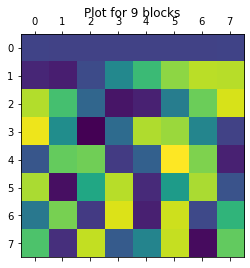

In [43]:
plt.matshow(np.transpose(v));
plt.title("Plot for 9 blocks")

In [44]:
def make_blocks(X_channel):
    row_n = np.random.randint(0,1015,30)
    R_channel = X_channel[row_n[0]:row_n[0]+8,:]
    for i in range(1,30):
        R_channel = np.hstack((R_channel,X_channel[row_n[i]:row_n[i]+8,:]))
    return R_channel

In [45]:
R_r = make_blocks(X_r)
R_g = make_blocks(X_g)
R_b = make_blocks(X_b)

In [46]:
R = np.hstack((R_r,R_g,R_b))

In [47]:
R = R - np.mean(R)

In [48]:
# cov_r = np.cov(R)
cov_r = np.dot(R,np.transpose(R))/R.shape[1]


In [49]:
w1, v1 = LA.eig(cov_r)

In [50]:
plot_r = np.dot(np.transpose(v1),R)

Text(0.5, 1.05, 'Plot for 90 blocks')

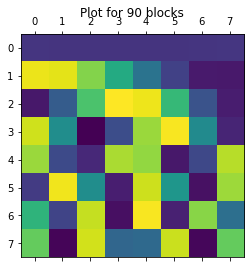

In [51]:
plt.matshow(np.transpose(v1));
plt.title("Plot for 90 blocks")

In [52]:
# plt.matshow(np.transpose(v));

The plot for the larger 90 blocks is darker. It seems to have contigious blocks of similar color compared to the 9 blocks plot. 